In [1]:
#Problem 19

import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

def one_hot_encode(y, num_classes):
    m = y.shape[0]
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), y] = 1
    return one_hot

def batch_gradient_descent(X_train, y_train, X_val, y_val, alpha=0.1, epochs=1000, tol=1e-4, early_stopping_rounds=10):
    m, n = X_train.shape
    num_classes = np.max(y_train) + 1
    y_train_encoded = one_hot_encode(y_train, num_classes)
    y_val_encoded = one_hot_encode(y_val, num_classes)
    
    theta = np.zeros((n, num_classes))
    best_loss = float('inf')
    patience = 0
    
    for epoch in range(epochs):
        logits = X_train @ theta
        y_pred = softmax(logits)
        
        gradient = (1 / m) * X_train.T @ (y_pred - y_train_encoded)
        theta -= alpha * gradient
        val_logits = X_val @ theta
        y_val_pred = softmax(val_logits)
        val_loss = cross_entropy_loss(y_val_encoded, y_val_pred)
        
        if val_loss < best_loss:
            best_loss = val_loss
            patience = 0
        else:
            patience += 1
            if patience >= early_stopping_rounds:
                print(f"Early stopping at epoch {epoch} with validation loss {val_loss:.4f}")
                break
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Validation Loss: {val_loss:.4f}")
    
    return theta

# Example usage with random data
np.random.seed(42)
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 3, 100)
X_val = np.random.rand(20, 5)
y_val = np.random.randint(0, 3, 20)

theta = batch_gradient_descent(X_train, y_train, X_val, y_val)

Epoch 0, Validation Loss: 1.0996
Early stopping at epoch 10 with validation loss 1.1093


Final theta: [-1.65839564e-16  8.70356184e-01]


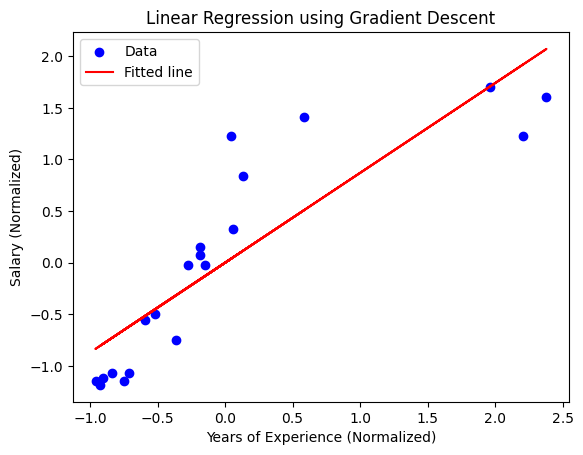

Prediction for 10 years of experience: 8.703561840558356


In [3]:
#Problem 20

import numpy as np
import matplotlib.pyplot as plt
data = [
    (5.6, 75000),
    (7.2, 120000),
    (3.1, 47000),
    (4.4, 37000),
    (1.0, 16000),
    (6.7, 140000),
    (1.2, 14000),
    (5.4, 80000),
    (9.8, 150000),
    (2.2, 16000),
    (3.5, 50000),
    (20, 160000),
    (17.6, 165000),
    (1.3, 17500),
    (1.7, 20000),
    (2.4, 20000),
    (5.4, 84000),
    (6.8, 93000),
    (4.9, 75000),
    (19.0, 140000)
]

X = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])
X = (X - np.mean(X)) / np.std(X)
Y = (Y - np.mean(Y)) / np.std(Y)

X_b = np.c_[np.ones(X.shape[0]), X]

learning_rate = 0.1
iterations = 1000
m = len(Y)

theta = np.zeros(2)

for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - Y
    gradient = (1/m) * X_b.T.dot(errors)
    theta -= learning_rate * gradient

print("Final theta:", theta)

plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, X_b.dot(theta), color='red', label='Fitted line')
plt.xlabel('Years of Experience (Normalized)')
plt.ylabel('Salary (Normalized)')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.show()

def predict(years_of_experience):
    normalized_x = (years_of_experience - np.mean(X)) / np.std(X)
    prediction = np.dot(np.array([1, normalized_x]), theta)
    return prediction * np.std(Y) + np.mean(Y)

prediction = predict(10)
print("Prediction for 10 years of experience:", prediction)


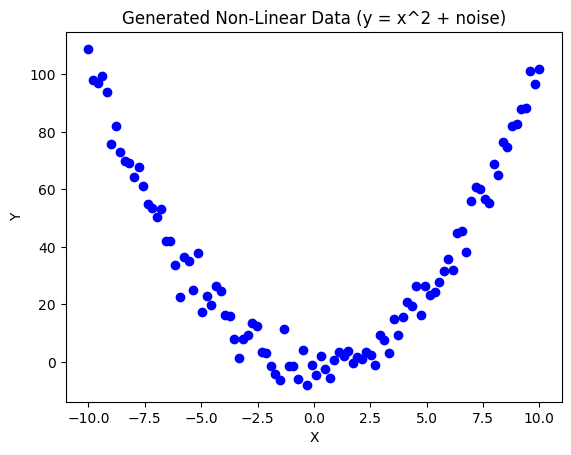

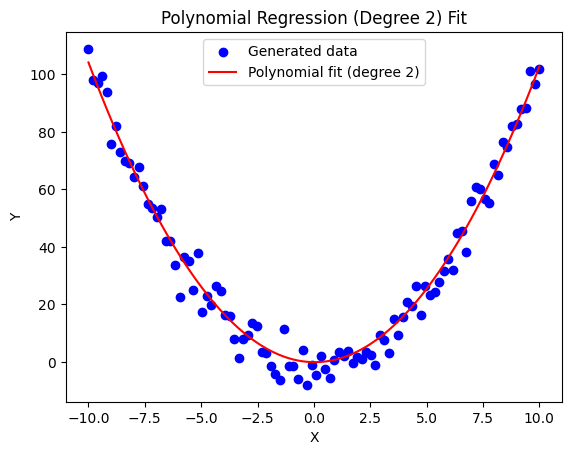

Prediction for x = 5: 25.44262114505131


In [4]:
# Problem 21

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  
X = np.linspace(-10, 10, 100)
Y = X**2 + np.random.normal(0, 5, size=X.shape)

plt.scatter(X, Y, color='blue', label='Generated data')
plt.title("Generated Non-Linear Data (y = x^2 + noise)")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

degree = 2
X_poly = np.vander(X, degree + 1, increasing=True)

learning_rate = 0.0001
iterations = 1000
m = len(Y)

theta_poly = np.zeros(degree + 1)

for i in range(iterations):
    predictions = X_poly.dot(theta_poly)
    errors = predictions - Y
    gradient = (1/m) * X_poly.T.dot(errors)
    theta_poly -= learning_rate * gradient

plt.scatter(X, Y, color='blue', label='Generated data')
plt.plot(X, X_poly.dot(theta_poly), color='red', label='Polynomial fit (degree 2)')
plt.title("Polynomial Regression (Degree 2) Fit")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

def predict_polynomial(x_value):
    x_poly = np.array([x_value**i for i in range(degree + 1)])
    prediction = np.dot(x_poly, theta_poly)
    return prediction

prediction = predict_polynomial(5)
print("Prediction for x = 5:", prediction)


In [7]:
# Problem 22

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

file_path = 'notebooks/Homework1/House price prediction data.csv'  
data = pd.read_csv(file_path)

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

n = X_test.shape[0] 
p = X_test.shape[1] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'notebooks/Homework1/House price prediction data.csv'

Accuracy: 1.00


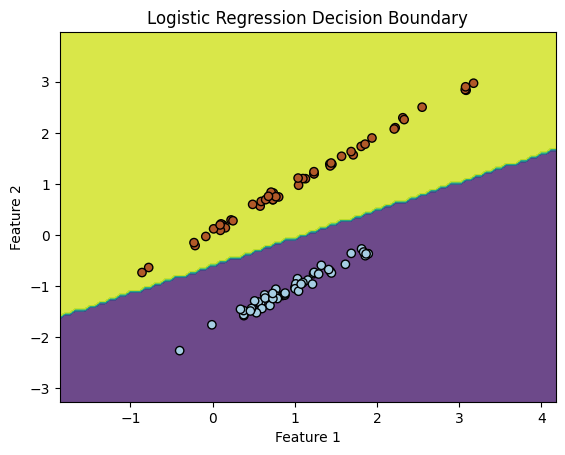

In [8]:
# Problem 23

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Accuracy: 0.33


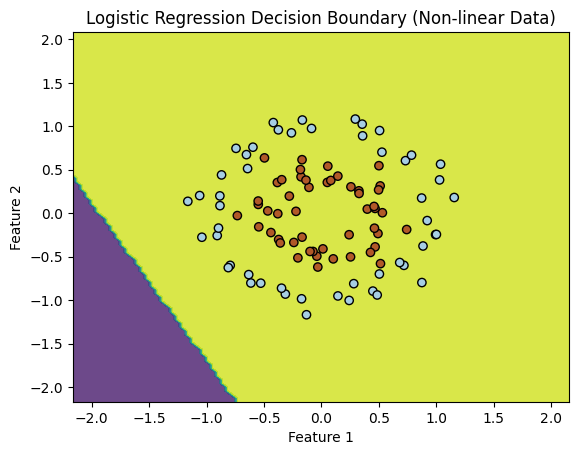

In [9]:
#Problem 24
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title('Logistic Regression Decision Boundary (Non-linear Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [13]:
#Problem 25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm = SVC(kernel='rbf', random_state=42)

one_vs_all = OneVsRestClassifier(svm)

param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(one_vs_all, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test.iloc[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}')
    ax.axis('off')

plt.show()



<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

Accuracy: 93.33%


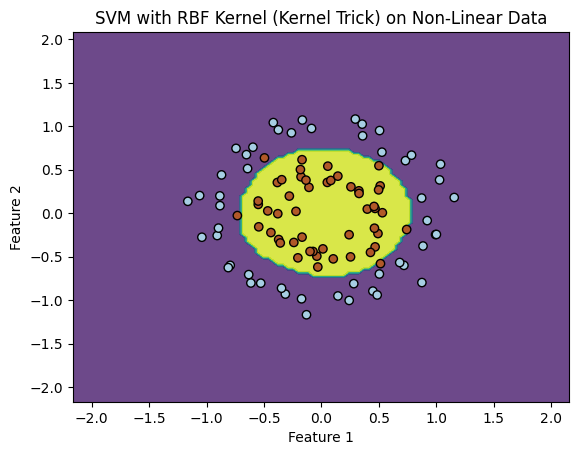

In [14]:
#problem 26
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title('SVM with RBF Kernel (Kernel Trick) on Non-Linear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
